In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
sns.set_context('paper')

import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_lg")

In [2]:
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103


[WDM] - Driver [C:\Users\Harish\.wdm\drivers\chromedriver\win32\83.0.4103.39\chromedriver.exe] found in cache


In [3]:
driver.get("https://www.economicshelp.org/blog/221/stock-market/how-does-the-stock-market-effect-the-economy-2/#:~:text=Economic%20effects%20of%20the%20stock%20market&text=The%20first%20impact%20is%20that,a%20fall%20in%20consumer%20spending.")

In [4]:
content = driver.page_source
soup = BeautifulSoup(content)

In [5]:
all_paras = soup.find_all('p')

In [6]:
text = ''
for p in all_paras:
    text += p.get_text()

In [7]:
print(text)

Movements in the stock market can have a profound economic impact on the economy and individual consumers. A collapse in share prices has the potential to cause widespread economic disruption. Most famously, the stock market crash of 1929 was a key factor in precipitating the great depression of the 1930s. Yet, daily movements in the stock market can also have less impact on the economy than we might imagine. The stock market is not the real economy. Share prices can change for many reasons – such as correcting an over-valuation and even large falls in share do not necessarily lead to lower growth.One well-known joke is:Stock markets have predicted 10 out of the last three recessions.The point is a rapid fall in share prices, doesn’t necessarily mean the economy is doing badly.For example, the stock market crash of 1987, didn’t cause any economic damage in the real economy. (though it did influence monetary policy). The UK cut interest rates in fear the stock market crash would cause a

In [8]:
document = nlp(text)
displacy.render(document, style = "ent",jupyter = True)

In [9]:
entities=[(str(i), i.label_) for i in document.ents]
print(entities)
entities_df = pd.DataFrame(entities, columns =['Entity', 'Label'])
entities_df.head()

[('1929', 'DATE'), ('the 1930s', 'DATE'), ('daily', 'DATE'), ('One', 'CARDINAL'), ('10', 'CARDINAL'), ('three', 'CARDINAL'), ('1987', 'DATE'), ('UK', 'GPE'), ('1987', 'DATE'), ('25%', 'PERCENT'), ('2008/09', 'DATE'), ('2008', 'DATE'), ('the end of 2008 early 2009', 'DATE'), ('the start of the year', 'DATE'), ('Coronavirus', 'ORG'), ('15%', 'PERCENT'), ('2020', 'DATE'), ('Between 2000 and 2004', 'CARDINAL'), ('2002', 'DATE'), ('2000-2007', 'DATE'), ('9/11', 'CARDINAL'), ('the Federal Reserve', 'ORG'), ('Sept 2001.In', 'DATE'), ('first', 'ORDINAL'), ('only around 10%', 'PERCENT'), ('ConfidenceOften', 'ORG'), ('2008/09', 'DATE'), ('two years', 'DATE'), ('10%', 'PERCENT'), ('90%', 'PERCENT'), ('just 7%', 'PERCENT'), ('10%', 'PERCENT'), ('first', 'ORDINAL'), ('jobs.3', 'PERSON'), ('zero contract hours', 'TIME'), ('UK', 'GPE'), ('Germany', 'GPE'), ('RelatedI am conducting research', 'ORG'), ('Tobin', 'PERSON'), ('ROA', 'PERSON'), ('1929', 'DATE'), ('the 1930s', 'DATE'), ('7.95', 'MONEY'), ('

,Entity,Label
0,1929,DATE
1,the 1930s,DATE
2,daily,DATE
3,One,CARDINAL
4,10,CARDINAL


In [10]:
counts = entities_df['Label'].value_counts()
counts

DATE        17
PERCENT      7
ORG          6
CARDINAL     5
MONEY        5
PERSON       4
GPE          3
ORDINAL      2
TIME         1
Name: Label, dtype: int64

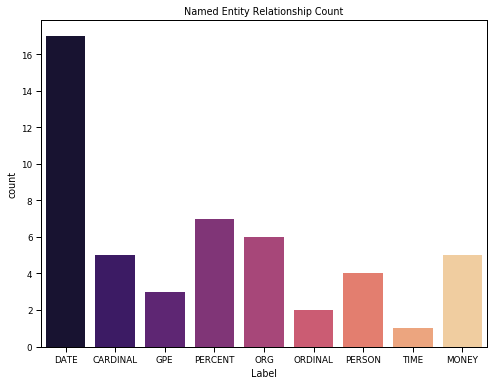

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Label', data = entities_df, palette = 'magma')
plt.title('Named Entity Relationship Count')
plt.show()